In [1]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

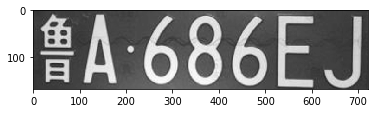

In [14]:
img = cv2.imread("car.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")
plt.show()

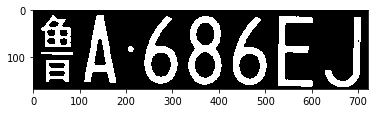

In [15]:
ret,img = cv2.threshold(img,175,255,cv2.THRESH_BINARY)# 大于127为255，小于127为0
plt.imshow(img,cmap="gray")
plt.show()

In [16]:
result=[] # result 用于判读该列是否属于字符的一部分，如果该列没有字符则值为0
for col in range(img.shape[1]):
    result.append(0)
    for row in range(img.shape[0]):
        result[col] = result[col]+img[row][col]/255

In [17]:
character_dict={} # 存储字符起始列的位置
num=0 #字符数
i=0 # 当前指向的列

In [18]:
while i < len(result):
    if result[i] == 0: # 该列没有字符
        i += 1
    else:
        index = i + 1  #该列有字符，index遍历寻找字符结束位置
        while result[index] != 0:
            index += 1
        character_dict[num] = [i, index-1]
        num += 1
        i = index

In [19]:
character_dict

{0: [17, 86],
 1: [110, 178],
 2: [204, 216],
 3: [240, 311],
 4: [335, 406],
 5: [430, 503],
 6: [528, 602],
 7: [629, 706]}

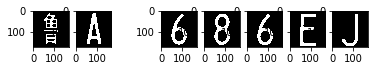

In [25]:
# 分割字符，第3个字符为点，舍弃
for i in range(8):
    if i==2:
        continue
    padding = (170 - (character_dict[i][1] - character_dict[i][0])) / 2 #高度170，宽度也应该是170
    character = np.pad(img[:,character_dict[i][0]:character_dict[i][1]], ((0,0), (int(padding), int(padding))), 'constant', constant_values=(0,0))# 填充字符的宽度
    #character = cv2.resize(character, (20,20))
    plt.subplot(1,8,i+1)
    plt.imshow(character,cmap="gray")
plt.show()